In [ ]:
# Loading iris dataset
from sklearn.datasets import load_iris

iris = load_iris()

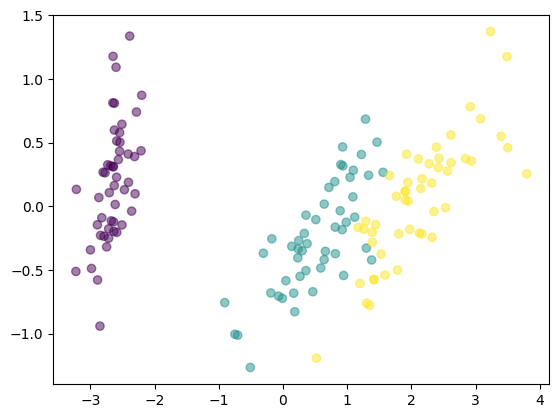

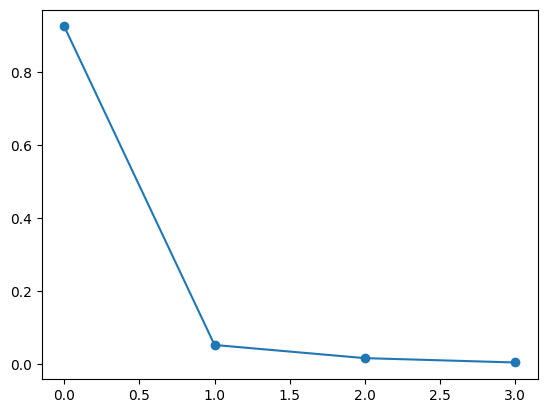

In [ ]:
# PCA in scikit-learn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=4)

x = iris['data']
Y = pca.fit_transform(x)

plt.scatter(Y[:, 0], Y[:, 1], c=iris['target'], alpha=0.5)
plt.show()

plt.plot(pca.explained_variance_ratio_, "-o")
plt.show()

L: [0.02367619 0.0776881  0.24105294 4.20005343]
Q: [[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


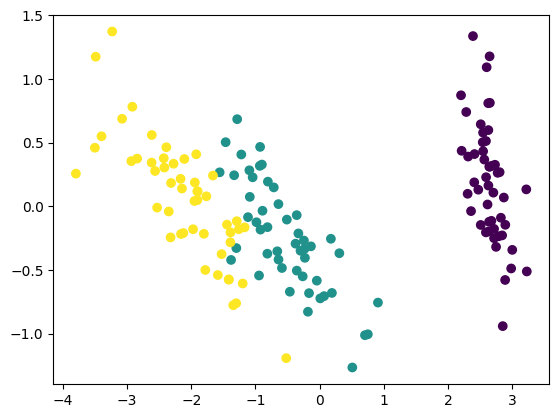

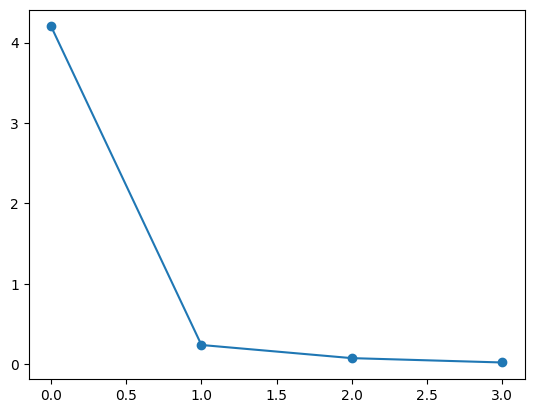

In [ ]:
# PCA vis Eigen Decomposition
from numpy import linalg

X = iris.data
X = X - X.mean(axis = 0)

C = (X.T @ X) / X.shape[0] # convariance matrix
L, Q = linalg.eigh(C) # eigen decomposition

print("L:", L)
print("Q:", Q)

plt.scatter(X @ Q[:,3], X @ Q[:,2], c=iris.target)
plt.show()

plt.plot(sorted(L, reverse = True), "-o")
plt.show()

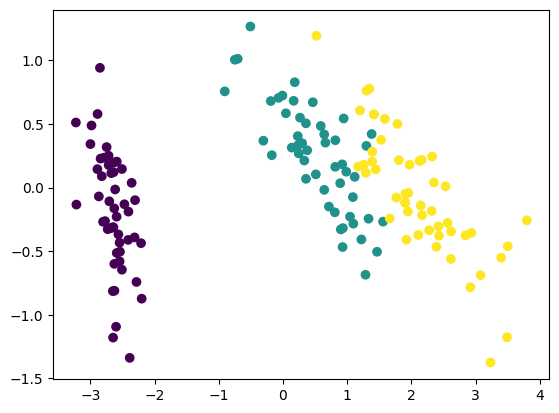

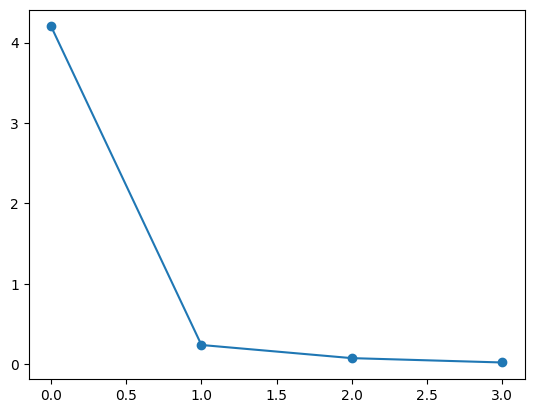

In [ ]:
# PCA via SVD
from numpy import linalg

X = iris.data
X = X - X.mean(axis = 0)

U, S, VT = linalg.svd(X)

plt.scatter(X @ VT[0], X @ VT[1], c=iris.target)
plt.show()

variances = (S ** 2) / X.shape[0]
plt.plot(variances, "-o")
plt.show()

L: [4.20005343 0.24105294 0.0776881  0.02367619]
Q: [[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]


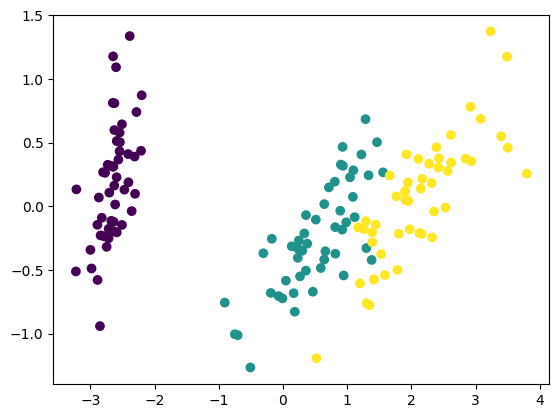

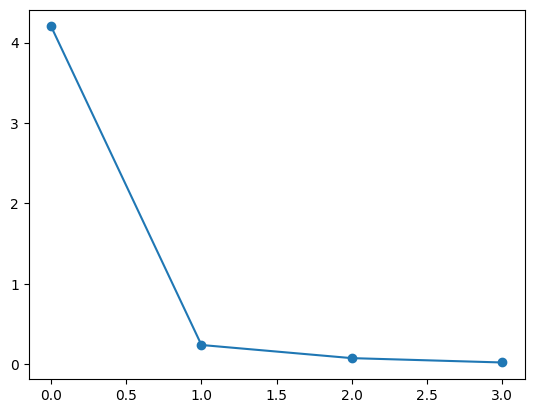

In [ ]:
# PCA via Power Method
import numpy as np

X = iris.data
X = X - X.mean(axis = 0)

# covariance matrix
C = (X.T @ X) / X.shape[0]

v = np.random.randn(C.shape[0], 1)
v = v / linalg.norm(v)

M = C.copy()

L = []
Q = []

for dim in range(4):
  for epoch in range(20):
    vp = M @ v
    lmd = linalg.norm(vp)
    vp = vp / lmd
    v = vp

  M = M - lmd * (v @ v.T)

  L.append(lmd)
  Q.append(v)

L = np.array(L)
Q = np.hstack(Q)

print("L:", L)
print("Q:", Q)

Y = X @ Q

plt.scatter(Y[:, 0], Y[:, 1], c=iris.target)
plt.show()

plt.plot(L, "-o")
plt.show()